## University of Maryland Computer Science Course Grade Predictor

### Tanmay Prakash, Shanil Kothari, Siddhesh Gupta

### Introduction

Have you ever wondered what grades you can get in a Computer Science course ? Have you ever thought how much work I need to put into this class to get a particular grade. If not we are sure that you must have thought about this while taking CMSC 351 with the great Clyde Kruskal or some similar/comparable course. At University of Maryland, every comp-sci student can either be seen banging their head with a wall or thinking about dropping computer science as a major.

With student's grade data we will like to determine what grade a particular student can get in a Computer Science course given the student's performance in past Computer Science Courses (Pre-Requisites or Gateway Courses). We want to answer the question that are grades and performance in a course correlated to the performance in the pre-requisite courses for that course ?

If our model is reasonabaly successful, we can provide insights to students which can prove very helpful when taking some important decisions. For E.g. A student can know that historically other students who have a similar performance to them have ended with a X grade in the class. So student can think and decide ok, I will have to put in more work than usual to earn a better grade than this. Or currentlly I am at this standing, should I drop the class ? And sometimes its just peace of mind and anxiety buster to know where you stand and where you can end-up at the end of the semester.

These decisions have a significant impact on your college plan, graduation, and even your GPA.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clean.csv")
df.head()

,Unnamed: 0,Users,CS_Track,CMSC4XX,Graduated,MATH140,MATH141,MATH240,MATH241,STAT400,...,CMSC456,CMSC457,CMSC460,CMSC466,CMSC320,CMSC425,CMSC472,CMSC473,CMSC474,CMSC475
0,0,User0,General,Yes,Not Completed,A,A,A,A,A,...,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
1,1,User1,General,No,NaN,A,A,A,A,A+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,User2,General,Yes,Not Completed,A,A,A,A,B+,...,NaN,NaN,NaN,NaN,B-,NaN,NaN,NaN,NaN,NaN
3,3,User3,Data Science,Yes,Not Completed,A,A,B,B+,B-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,User4,General,Yes,Not Completed,A,A+,A-,A,A,...,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,Unnamed: 0,Users,CS_Track,CMSC4XX,Graduated,MATH140,MATH141,MATH240,MATH241,STAT400,...,CMSC456,CMSC457,CMSC460,CMSC466,CMSC320,CMSC425,CMSC472,CMSC473,CMSC474,CMSC475
0,0,User0,General,Yes,Not Completed,A,A,A,A,A,...,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
1,1,User1,General,No,NaN,A,A,A,A,A+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,User2,General,Yes,Not Completed,A,A,A,A,B+,...,NaN,NaN,NaN,NaN,B-,NaN,NaN,NaN,NaN,NaN
3,3,User3,Data Science,Yes,Not Completed,A,A,B,B+,B-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,User4,General,Yes,Not Completed,A,A+,A-,A,A,...,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.replace("Don't want to share", "Not Attempted")

In [5]:
def replace_not_attempted(df, grade):
    return df.replace('Not Attempted', grade)

In [6]:
df2 = df[["Users", "CMSC131", "CMSC132", "CMSC216", "CMSC250"]]

In [7]:
df_cs_Aplus = replace_not_attempted(df2, 'A+')
df_cs_A = replace_not_attempted(df2, 'A')
df_cs_Aminus = replace_not_attempted(df2, 'A-')
df_cs_Bplus = replace_not_attempted(df2, 'B+')
df_cs_B = replace_not_attempted(df2, 'B')
df_cs_Bminus = replace_not_attempted(df2, 'B-')

In [8]:
df3 = df[["Users", "MATH140", "MATH141", "MATH240", "MATH241", "STAT400"]]

In [9]:
df_math_Aplus = replace_not_attempted(df3, 'A+')
df_math_A = replace_not_attempted(df3, 'A')
df_math_Aminus = replace_not_attempted(df3, 'A-')
df_math_Bplus = replace_not_attempted(df3, 'B+')
df_math_B = replace_not_attempted(df3, 'B')
df_math_Bminus = replace_not_attempted(df3, 'B-')

In [10]:
df_upper = df[["Users", "CMSC330", "CMSC351", "CMSC411", "CMSC412", "CMSC414", "CMSC416", "CMSC417", "CMSC420", "CMSC421",
              "CMSC422", "CMSC423", "CMSC424", "CMSC426", "CMSC427", "CMSC470", "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", 
              "CMSC451", "CMSC452", "CMSC454", "CMSC456", "CMSC457", "CMSC460", "CMSC466", "CMSC320", "CMSC425", "CMSC472", 
              "CMSC473", "CMSC474", "CMSC475"]]

In [11]:
df_upper = df_upper.replace("Not Attempted", np.NaN)

In [12]:
def merger(df, df_cs, df_math, df_upper):
    df = df[["Users", "CS_Track", "CMSC4XX", "Graduated"]]
    df_temp = df.merge(df_math, on = "Users")
    df_temp = df_temp.merge(df_cs, on = "Users")
    return df_temp.merge(df_upper, on = "Users")

In [13]:
df = merger(df, df_cs_A, df_math_A, df_upper)
df

,Users,CS_Track,CMSC4XX,Graduated,MATH140,MATH141,MATH240,MATH241,STAT400,CMSC131,...,CMSC456,CMSC457,CMSC460,CMSC466,CMSC320,CMSC425,CMSC472,CMSC473,CMSC474,CMSC475
0,User0,General,Yes,Not Completed,A,A,A,A,A,A,...,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
1,User1,General,No,NaN,A,A,A,A,A+,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,User2,General,Yes,Not Completed,A,A,A,A,B+,B,...,NaN,NaN,NaN,NaN,B-,NaN,NaN,NaN,NaN,NaN
3,User3,Data Science,Yes,Not Completed,A,A,B,B+,B-,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,User4,General,Yes,Not Completed,A,A+,A-,A,A,A,...,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,User160,General,No,NaN,A,A,B+,A,A+,B-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,User161,General,Yes,Not Completed,A,A,A,A,A,A,...,NaN,NaN,NaN,NaN,A+,NaN,NaN,NaN,NaN,NaN
162,User162,Machine Learning,Yes,Not Completed,A,A,A,A,A,B,...,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN
163,User163,General,Yes,Not Completed,A+,A+,B,A,B,A+,...,NaN,NaN,NaN,NaN,A+,A,NaN,NaN,NaN,NaN


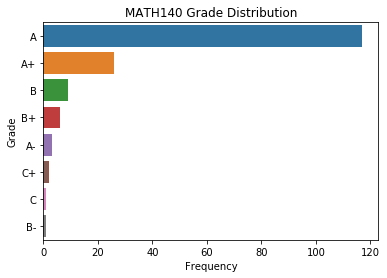

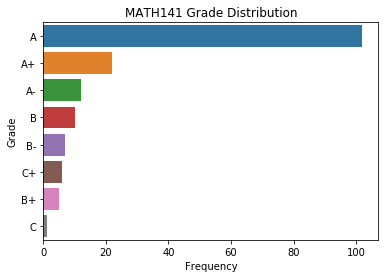

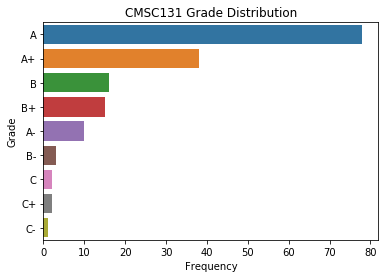

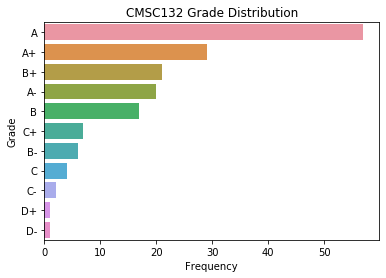

In [23]:
MATH140 = df['MATH140'].value_counts()
sns.barplot(MATH140.values, MATH140.index)
plt.title("MATH140 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
MATH141 = df['MATH141'].value_counts()
sns.barplot(MATH141.values, MATH141.index)
plt.title("MATH141 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
CMSC131 = df['CMSC131'].value_counts()
sns.barplot(CMSC131.values, CMSC131.index)
plt.title("CMSC131 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
CMSC132 = df['CMSC132'].value_counts()
sns.barplot(CMSC132.values, CMSC132.index)
plt.title("CMSC132 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()


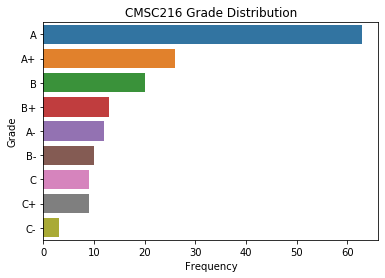

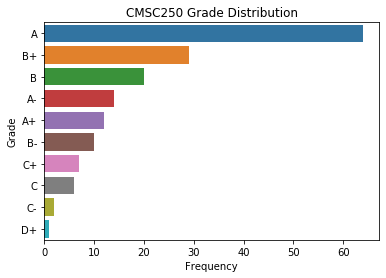

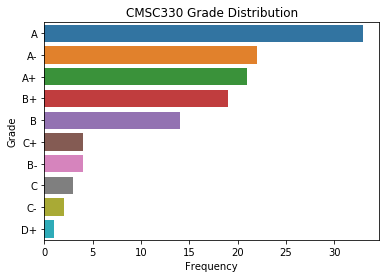

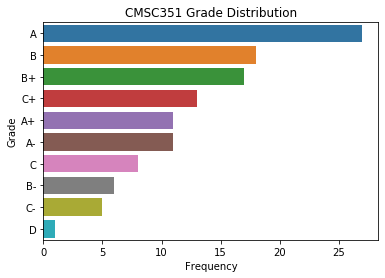

In [15]:
# CMSC216
CMSC216 = df['CMSC216'].value_counts()
sns.barplot(CMSC216.values, CMSC216.index)
plt.title("CMSC216 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC250
CMSC250 = df['CMSC250'].value_counts()
sns.barplot(CMSC250.values, CMSC250.index)
plt.title("CMSC250 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC330
CMSC330 = df['CMSC330'].value_counts()
sns.barplot(CMSC330.values, CMSC330.index)
plt.title("CMSC330 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC351
CMSC351 = df['CMSC351'].value_counts()
sns.barplot(CMSC351.values, CMSC351.index)
plt.title("CMSC351 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()

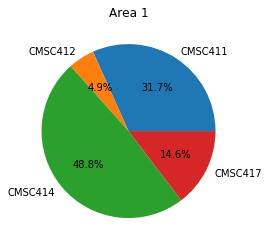

In [16]:
# AREA 1
NaNs_411 = df['CMSC411'].isna().sum()
NaNs_412 = df['CMSC412'].isna().sum()
NaNs_414 = df['CMSC414'].isna().sum()
NaNs_417 = df['CMSC417'].isna().sum()
CMSC411_num = 165 - NaNs_411
CMSC412_num = 165 - NaNs_412
CMSC414_num = 165 - NaNs_414
CMSC417_num = 165 - NaNs_417
data = [CMSC411_num, CMSC412_num, CMSC414_num, CMSC417_num]
labels = 'CMSC411', 'CMSC412', 'CMSC414', 'CMSC417'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 1")
plt.show()

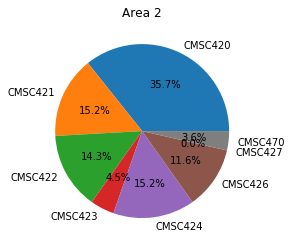

In [17]:
# AREA 2
NaNs_420 = df['CMSC420'].isna().sum()
NaNs_421 = df['CMSC421'].isna().sum()
NaNs_422 = df['CMSC422'].isna().sum()
NaNs_423 = df['CMSC423'].isna().sum()
NaNs_424 = df['CMSC424'].isna().sum()
NaNs_426 = df['CMSC426'].isna().sum()
NaNs_427 = df['CMSC427'].isna().sum()
NaNs_470 = df['CMSC470'].isna().sum()
CMSC420_num = 165 - NaNs_420
CMSC421_num = 165 - NaNs_421
CMSC422_num = 165 - NaNs_422
CMSC423_num = 165 - NaNs_423
CMSC424_num = 165 - NaNs_424
CMSC426_num = 165 - NaNs_426
CMSC427_num = 165 - NaNs_427
CMSC470_num = 165 - NaNs_470
data = [CMSC420_num, CMSC421_num, CMSC422_num, CMSC423_num, CMSC424_num, CMSC426_num, CMSC427_num, CMSC470_num]
labels = 'CMSC420', 'CMSC421', 'CMSC422', 'CMSC423', 'CMSC424', 'CMSC426', 'CMSC427', 'CMSC470'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 2")
plt.show()

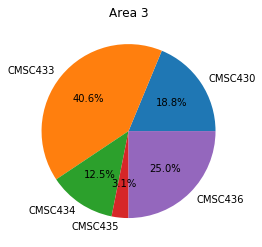

In [18]:
# AREA 3
NaNs_430 = df['CMSC430'].isna().sum()
NaNs_433 = df['CMSC433'].isna().sum()
NaNs_434 = df['CMSC434'].isna().sum()
NaNs_435 = df['CMSC435'].isna().sum()
NaNs_436 = df['CMSC436'].isna().sum()
CMSC430_num = 165 - NaNs_430
CMSC433_num = 165 - NaNs_433
CMSC434_num = 165 - NaNs_434
CMSC435_num = 165 - NaNs_435
CMSC436_num = 165 - NaNs_436
data = [CMSC430_num, CMSC433_num, CMSC434_num, CMSC435_num, CMSC436_num]
labels = 'CMSC430', 'CMSC433', 'CMSC434', 'CMSC435', 'CMSC436'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 3")
plt.show()

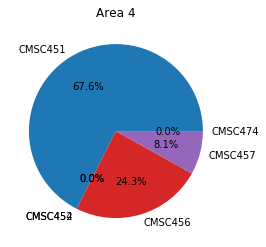

In [19]:
# AREA 4
NaNs_451 = df['CMSC451'].isna().sum()
NaNs_452 = df['CMSC452'].isna().sum()
NaNs_454 = df['CMSC454'].isna().sum()
NaNs_456 = df['CMSC456'].isna().sum()
NaNs_457 = df['CMSC457'].isna().sum()
NaNs_474 = df['CMSC474'].isna().sum()
CMSC451_num = 165 - NaNs_451
CMSC452_num = 165 - NaNs_452
CMSC454_num = 165 - NaNs_454
CMSC456_num = 165 - NaNs_456
CMSC457_num = 165 - NaNs_457
CMSC474_num = 165 - NaNs_474
data = [CMSC451_num, CMSC452_num, CMSC454_num, CMSC456_num, CMSC457_num, CMSC474_num]
labels = 'CMSC451', 'CMSC452', 'CMSC454', 'CMSC456', 'CMSC457', 'CMSC474'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 4")
plt.show()

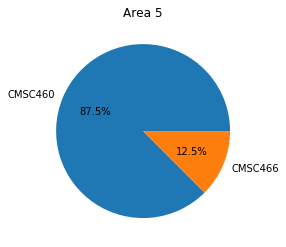

In [20]:
# AREA 5
NaNs_460 = df['CMSC460'].isna().sum()
NaNs_466 = df['CMSC466'].isna().sum()
CMSC460_num = 165 - NaNs_460
CMSC466_num = 165 - NaNs_466
data = [CMSC460_num, CMSC466_num]
labels = 'CMSC460', 'CMSC466'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 5")
plt.show()

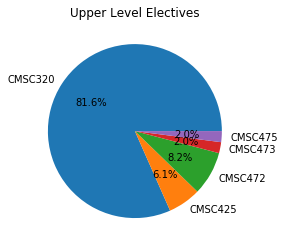

In [21]:
# UPPER LEVEL ELECTIVES
NaNs_320 = df['CMSC320'].isna().sum()
NaNs_425 = df['CMSC425'].isna().sum()
NaNs_472 = df['CMSC472'].isna().sum()
NaNs_473 = df['CMSC473'].isna().sum()
NaNs_475 = df['CMSC475'].isna().sum()
CMSC320_num = 165 - NaNs_320
CMSC425_num = 165 - NaNs_425
CMSC472_num = 165 - NaNs_472
CMSC473_num = 165 - NaNs_473
CMSC475_num = 165 - NaNs_475
data = [CMSC420_num, CMSC425_num, CMSC472_num, CMSC473_num, CMSC475_num]
labels = 'CMSC320', 'CMSC425', 'CMSC472','CMSC473', 'CMSC475'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Upper Level Electives")
plt.show()